# Analyzing Austin PD's Crime Reports Dataset

The dataset is available from the Austin Police Department on https://data.austintexas.gov/Public-Safety/Crime-Reports/fdj4-gpfu.


## Table of Contents 

    I. Introduction
    II. Data Scrubbing
    III. Exploratory Analysis 
    
    Questions:
><ul>
><li><a href="#q1"> 1. What areas of Austin have the highest crime rates?</a></li>
><li><a href="#q2"> 2. How is crime distributed in 78701?</a></li> 
><li><a href="#q3"> 3. How is crime distributed in 78753?</a></li>     
><li><a href="#q4"> 4. How is crime distributed in 78741?</a></li>
><li><a href="#q5"> 5. How is crime distributed in 78745?</a></li>
><li><a href="#q6"> 6. How is crime distributed in 78705?</a></li>
><li><a href="#q7"> 7. How is crime distributed in 78746?</a></li>
><li><a href="#q8"> 8. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed?
><li><a href="#q9"> 9. How is crime distributed across different districts and sectors around Austin? Location types?
><li><a href="#q10"> 10. How is crime distributed across different
><li><a href="#q11"> 11. How does violent crime appear on the map?
><li><a href="#q12"> 12. Are there any addresses where violent crime and murder occurs frequently?
</a></li>

## I. Introduction

I began reviewing the Crime Reports dataset, provided by the Austin PD, around the same time I began reviewing its Hate Crimes datasets for analysis, at the beginning of 2020. This is a rather large dataset, containing over 2 million records, spanning from 2003 to the present, and is updated weekly. 

This is a self-paced project, conceived outside of both work and the educational arenas. It is my hope that this project will reveal some actionable insights that will benefit the Austin law enforcement community, news outlets, and anyone else interested in gaining knowledge on how best to combat the problem of crime in the Austin area.

I first attempted importing the data into this notebook using Sodapy's Socrata API method but found it lacking. It didn't import the entire dataset, and added several redundant columns. I, therefore, prefer to manually download the entire dataset and re-download each week after it's updated.

In [27]:
# importing necessary libraries and configurations
import folium
from folium import plugins

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import itertools
import warnings

plt.style.use("classic")
pd.set_option("display.max_columns", None)
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("Crime_Reports.csv")

In [3]:
# examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318410 entries, 0 to 2318409
Data columns (total 27 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Incident Number              int64  
 1   Highest Offense Description  object 
 2   Highest Offense Code         int64  
 3   Family Violence              object 
 4   Occurred Date Time           object 
 5   Occurred Date                object 
 6   Occurred Time                float64
 7   Report Date Time             object 
 8   Report Date                  object 
 9   Report Time                  float64
 10  Location Type                object 
 11  Address                      object 
 12  Zip Code                     float64
 13  Council District             float64
 14  APD Sector                   object 
 15  APD District                 object 
 16  PRA                          object 
 17  Census Tract                 float64
 18  Clearance Status             object 
 19  

None

Incident Number                      0
Highest Offense Description          0
Highest Offense Code                 0
Family Violence                      0
Occurred Date Time                 165
Occurred Date                        0
Occurred Time                       84
Report Date Time                     1
Report Date                          0
Report Time                          1
Location Type                    21065
Address                             12
Zip Code                         14310
Council District                 47348
APD Sector                        9103
APD District                      9583
PRA                              10858
Census Tract                   1143970
Clearance Status                607711
Clearance Date                  338513
UCR Category                   1526504
Category Description           1526504
X-coordinate                     10266
Y-coordinate                     10266
Latitude                         39184
Longitude                

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,20191571574,FRAUD - OTHER,1199,N,06/03/2019 04:00:00 PM,06/03/2019,1600.0,06/06/2019 05:34:00 PM,06/06/2019,1734.0,DEPARTMENT / DISCOUNT STORE,10817 BALLARD PATH,78717.0,6.0,AD,5,573.0,203.11,NaN,NaN,NaN,NaN,3097785.0,3097785.0,30.483646,-97.789495,"(30.48364631, -97.7894953)"
1,20191550153,DEADLY CONDUCT,408,N,06/04/2019 03:12:00 AM,06/04/2019,312.0,06/04/2019 03:16:00 AM,06/04/2019,316.0,RESIDENCE / HOME,8312 N IH 35 SVRD SB,78753.0,4.0,ED,1,250.0,18.06,N,06/06/2019,13A,Aggravated Assault,3128227.0,3128227.0,30.346646,-97.696573,"(30.34664576, -97.69657342)"
2,20195022816,THEFT OF LICENSE PLATE,614,N,06/03/2019 03:00:00 PM,06/03/2019,1500.0,06/04/2019 03:22:00 PM,06/04/2019,1522.0,RESIDENCE / HOME,6312 LIBYAN DR,78745.0,2.0,FR,4,509.0,24.09,N,06/04/2019,23G,Theft,3098393.0,3098393.0,30.205267,-97.794900,"(30.20526729, -97.79490043)"
3,20205007833,RUNAWAY CHILD,4100,N,02/22/2020 06:00:00 PM,02/22/2020,1800.0,02/24/2020 06:03:00 PM,02/24/2020,1803.0,RESIDENCE / HOME,13012 DEARBONNE DR,78617.0,2.0,HE,7,612.0,NaN,N,03/03/2020,NaN,NaN,3155456.0,3155456.0,30.176140,-97.615031,"(30.17613952, -97.6150307)"
4,20191671388,BURGLARY OF RESIDENCE,500,N,06/14/2019 12:00:00 PM,06/14/2019,1200.0,06/16/2019 10:00:00 PM,06/16/2019,2200.0,RESIDENCE / HOME,3809 SPICEWOOD SPRINGS RD EB,78731.0,10.0,BA,8,256.0,17.51,N,09/18/2019,220,Burglary,3111039.0,3111039.0,30.364987,-97.750587,"(30.36498691, -97.75058749)"


,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,Location Type,Address,Zip Code,Council District,APD Sector,APD District,PRA,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
2318405,2014780586,PUBLIC INTOXICATION,2300,N,03/19/2014 10:00:00 AM,03/19/2014,1000.0,03/19/2014 12:39:00 PM,03/19/2014,1239.0,GOVERNMENT / PUBLIC BUILDING,715 E 8TH ST,78701.0,9.0,GE,2,382.0,11.00,NaN,NaN,NaN,NaN,3116884.0,3116884.0,30.267553,-97.734674,"(30.26755343, -97.73467415)"
2318406,20113421712,CUSTODY ARREST TRAFFIC WARR,3722,N,12/08/2011 09:34:00 PM,12/08/2011,2134.0,12/08/2011 09:34:00 PM,12/08/2011,2134.0,STREETS / HWY / ROAD / ALLEY,8900 N IH 35 SVRD SB,78753.0,4.0,ED,1,250.0,18.00,C,12/13/2011,NaN,NaN,3129387.0,3129387.0,30.353533,-97.692706,"(30.35353289, -97.69270637)"
2318407,20072401880,THEFT,600,N,08/28/2007 06:26:00 PM,08/28/2007,1826.0,08/28/2007 06:30:00 PM,08/28/2007,1830.0,DEPARTMENT / DISCOUNT STORE,1000 E 41ST ST,78751.0,9.0,BA,5,332.0,3.00,C,09/24/2007,23H,Theft,3121344.0,3121344.0,30.300461,-97.719652,"(30.30046112, -97.71965166)"
2318408,2013451114,THEFT BY SHOPLIFTING,607,N,02/14/2013 02:59:00 PM,02/14/2013,1459.0,02/14/2013 02:59:00 PM,02/14/2013,1459.0,GROCERY / SUPERMARKET,9414 N LAMAR BLVD,78758.0,4.0,ED,1,238.0,18.19,C,02/26/2013,23C,Theft,3127650.0,3127650.0,30.364991,-97.697902,"(30.36499057, -97.69790197)"
2318409,20051511101,CUSTODY ARREST TRAFFIC WARR,3722,N,05/31/2005 02:14:00 PM,05/31/2005,1414.0,05/31/2005 02:14:00 PM,05/31/2005,1414.0,STREETS / HWY / ROAD / ALLEY,W ANDERSON LN / SHOAL CREEK BLVD,78757.0,7.0,BA,6,246.0,18.17,C,06/01/2005,NaN,NaN,3114143.0,3114143.0,30.361017,-97.740849,"(30.36101697, -97.74084923)"


## II. Data Prep

There are several columns we don't need which we'll drop. We'll index the data according to the OCCURRED DATE TIME column. The following code creates a reproducible script for scrubbing and parsing the data.

In [4]:
def clean_data(df):
    drop_col = [
        "Incident Number",
        "Occurred Time",
        "Occurred Date Time",
        "Highest Offense Code",
        "Census Tract",
        "PRA",
        "Report Date",
        "Report Time",
        "UCR Category",
        "Category Description",
        "X-coordinate",
        "Y-coordinate",
        "Location",
    ]
    df.drop(drop_col, axis=1, inplace=True)
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    fillna = [
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
        "clearance_status",
    ]
    df[fillna].fillna("N/A", inplace=True)
    date_col = ["occurred_date", "report_date_time", "clearance_date"]
    cat_col = [
        "highest_offense_description",
        "zip_code",
        "location_type",
        "council_district",
        "apd_district",
        "apd_sector",
    ]
    df[date_col] = df[date_col].astype("datetime64")
    df[cat_col] = df[cat_col].astype("category")
    df["year"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.year
    df["month"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.month
    df["week"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.week
    df["day"] = pd.to_datetime(df["occurred_date"], format="%m/%d/%Y").dt.day
    df.set_index(["occurred_date"], inplace=True)
    df.sort_index(inplace=True)
    return df


df = clean_data(df)

In [5]:
# Checking for and removing any duplicates
df.duplicated().sum()

834

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [7]:
# Re-examining the dataframe
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2317576 entries, 2003-01-01 to 2021-03-20
Data columns (total 17 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   highest_offense_description  category      
 1   family_violence              object        
 2   report_date_time             datetime64[ns]
 3   location_type                category      
 4   address                      object        
 5   zip_code                     category      
 6   council_district             category      
 7   apd_sector                   category      
 8   apd_district                 category      
 9   clearance_status             object        
 10  clearance_date               datetime64[ns]
 11  latitude                     float64       
 12  longitude                    float64       
 13  year                         int64         
 14  month                        int64         
 15  week                         int64

None

highest_offense_description         0
family_violence                     0
report_date_time                    1
location_type                   21054
address                            12
zip_code                        14305
council_district                47330
apd_sector                       9099
apd_district                     9579
clearance_status               607476
clearance_date                 338353
latitude                        39156
longitude                       39156
year                                0
month                               0
week                                0
day                                 0
dtype: int64

,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2003-01-01,CUSTODY ARREST TRAFFIC WARR,N,2003-01-01 17:12:00,STREETS / HWY / ROAD / ALLEY,1000 BLOCK BANISTER LN,78704.0,3.0,DA,2,C,2003-01-01,30.229792,-97.775157,2003,1,1,1
2003-01-01,IDENTITY THEFT,N,2011-03-07 15:00:00,RESIDENCE / HOME,1845 BURTON DR,78741.0,3.0,HE,2,N,2011-03-16,30.234429,-97.729699,2003,1,1,1
2003-01-01,THEFT BY SHOPLIFTING,N,2003-01-01 14:28:00,SPECIALTY STORE (TV FUR ETC.),5808 BURNET RD,78756.0,7.0,BA,6,N,NaT,30.334253,-97.741086,2003,1,1,1
2003-01-01,DWI,N,2003-01-01 01:36:00,PARKING LOTS / GARAGE,2237 E RIVERSIDE DR,78741.0,3.0,HE,2,C,2003-02-13,30.238207,-97.726243,2003,1,1,1
2003-01-01,IDENTITY THEFT,N,2003-09-05 15:05:00,RESIDENCE / HOME,12151 N I 35 NB SVC RD,78753.0,1.0,ED,7,O,2003-09-10,30.394107,-97.671280,2003,1,1,1


,highest_offense_description,family_violence,report_date_time,location_type,address,zip_code,council_district,apd_sector,apd_district,clearance_status,clearance_date,latitude,longitude,year,month,week,day
occurred_date,,,,,,,,,,,,,,,,,
2021-03-20,BURGLARY NON RESIDENCE,N,2021-03-20 21:22:00,RESTAURANTS,2730 E CESAR CHAVEZ ST,78702.0,3.0,CH,1,NaN,NaT,30.253231,-97.712985,2021,3,11,20
2021-03-20,THEFT,N,2021-03-20 15:52:00,RESIDENCE / HOME,1071 CLAYTON LN,78723.0,4.0,ID,5,NaN,NaT,30.318529,-97.703422,2021,3,11,20
2021-03-20,ASSAULT BY THREAT,N,2021-03-20 18:20:00,STREETS / HWY / ROAD / ALLEY,E 7TH ST / TRINITY ST,78701.0,9.0,GE,2,NaN,NaT,30.268006,-97.738955,2021,3,11,20
2021-03-20,BURGLARY OF VEH-NO SUSPECT/FU,N,2021-03-20 16:21:00,PARKING LOTS / GARAGE,STRATFORD DR / NATURE CENTER DR,78746.0,8.0,DA,1,NaN,NaT,30.272986,-97.773927,2021,3,11,20
2021-03-20,BURGLARY NON RESIDENCE,N,2021-03-20 19:47:00,RESTAURANTS,400 E 6TH ST,78701.0,9.0,GE,2,NaN,NaT,30.267351,-97.739093,2021,3,11,20


## III. Exploratory Analysis

<a id='q1'></a>
### A. What areas of Austin have the highest crime rates? 

78741.0    207874
78753.0    180338
78701.0    169147
78758.0    160455
78704.0    155679
78745.0    151775
78702.0    137225
78744.0    127110
78723.0    119464
78752.0     85031
78748.0     68681
78759.0     66933
78751.0     64561
78757.0     58293
78705.0     57527
78721.0     47723
78749.0     40731
78724.0     38003
78727.0     36166
78703.0     35461
78731.0     28936
78746.0     28275
78729.0     25550
78750.0     23932
78754.0     23084
Name: zip_code, dtype: int64

78741.0    0.090252
78753.0    0.078296
78701.0    0.073438
78758.0    0.069664
78704.0    0.067590
78745.0    0.065895
78702.0    0.059578
78744.0    0.055187
78723.0    0.051867
78752.0    0.036917
78748.0    0.029819
78759.0    0.029060
78751.0    0.028030
78757.0    0.025309
78705.0    0.024976
78721.0    0.020720
78749.0    0.017684
78724.0    0.016500
78727.0    0.015702
78703.0    0.015396
78731.0    0.012563
78746.0    0.012276
78729.0    0.011093
78750.0    0.010390
78754.0    0.010022
Name: zip_code, dtype: float64

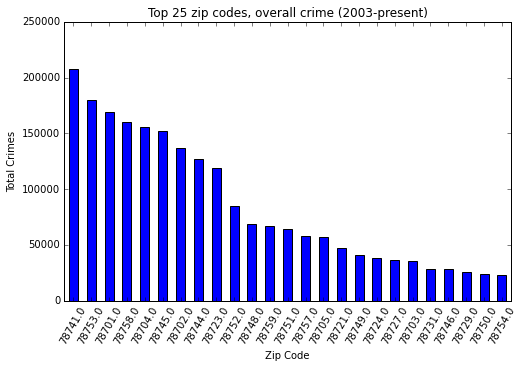

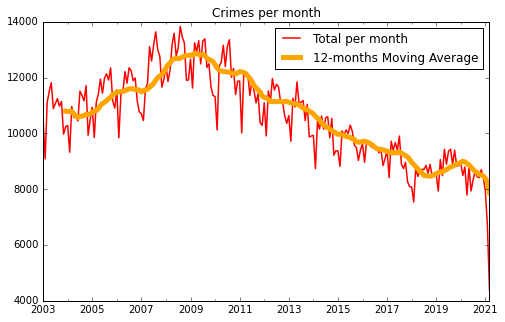

In [28]:
# Create and display dataframes for crime rates by zipcode and as percentages
display(df.zip_code.value_counts().head(25))
display(df.zip_code.value_counts(normalize=True).head(25))

# Visualizing the top 25 crime-ridden zip codes in Austin
df.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes, overall crime (2003-present)",
    figsize=(8, 5),
    xlabel="Zip Code",
    ylabel="Total Crimes",
    rot=60,
)
plt.show()

# Creating a time series plot with a 12 month rolling average
plt.figure(figsize=(8, 5))
df.resample("M").size().plot(color="red", linewidth=1.5, label="Total per month")
df.resample("M").size().rolling(window=12).mean().plot(
    color="orange", linewidth=5, label="12-months Moving Average"
)
plt.title("Crimes per month")
plt.xlabel("")
plt.legend()
plt.show()

### B. Examining the top crime types in Austin 

BURGLARY OF VEHICLE               231769
THEFT                             212601
FAMILY DISTURBANCE                180807
CRIMINAL MISCHIEF                 128168
ASSAULT W/INJURY-FAM/DATE VIOL     78494
BURGLARY OF RESIDENCE              77349
DWI                                69873
PUBLIC INTOXICATION                68863
HARASSMENT                         64607
DISTURBANCE - OTHER                61954
Name: highest_offense_description, dtype: int64

,BURGLARY OF VEHICLE,DWI,HARASSMENT,CRIMINAL MISCHIEF,PUBLIC INTOXICATION,BURGLARY OF RESIDENCE,ASSAULT W/INJURY-FAM/DATE VIOL,FAMILY DISTURBANCE,TOTAL
occurred_date,,,,,,,,,
2020-11-30,482,184,239,507,71,162,283,864,2792
2020-12-31,409,165,248,478,50,187,253,825,2615
2021-01-31,362,168,246,432,55,127,256,815,2461
2021-02-28,314,132,163,334,62,118,242,811,2176
2021-03-31,293,112,103,214,42,106,153,305,1328


<Figure size 432x288 with 0 Axes>

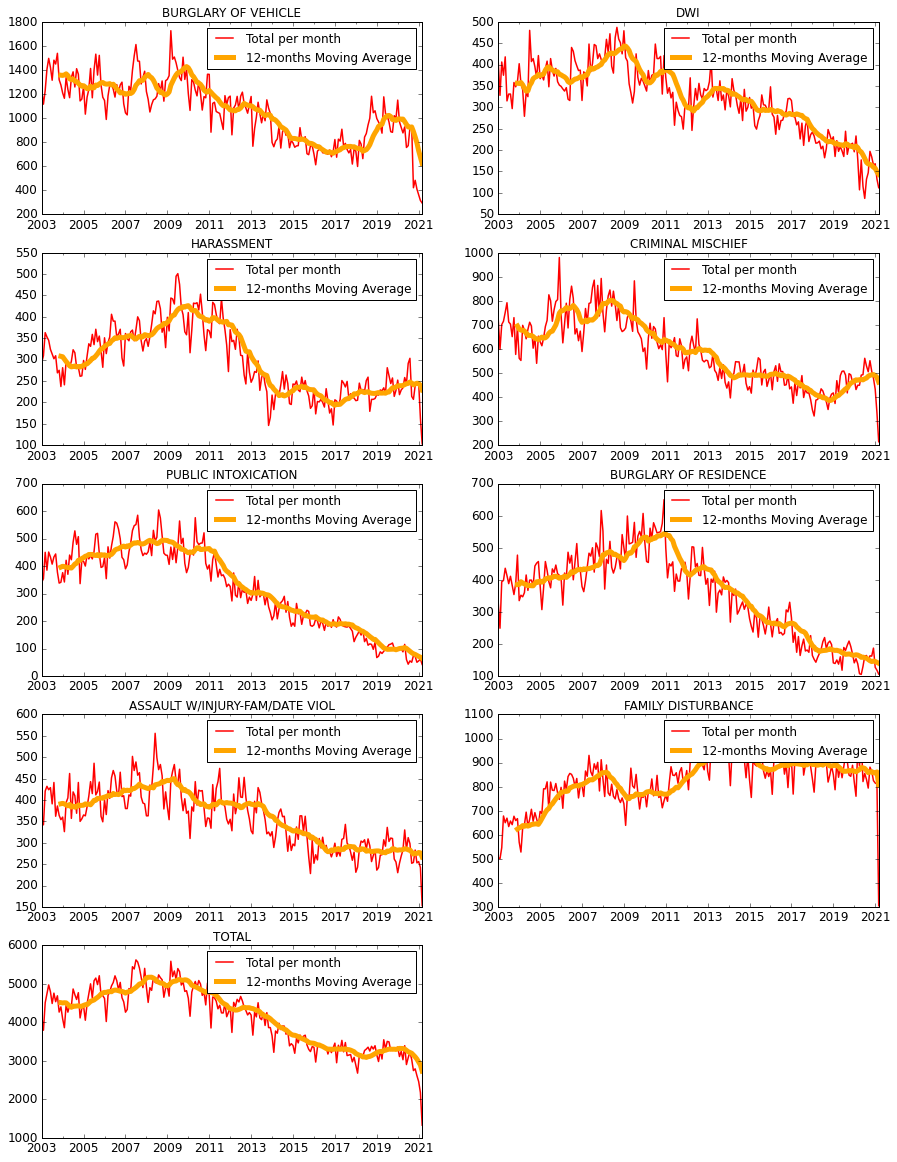

In [29]:
display(df["highest_offense_description"].value_counts().head(10))

df2 = df.query(
    'highest_offense_description == ["BURGLARY OF VEHICLE", "FAMILY DISTURBANCE", "CRIMINAL MISCHIEF", "ASSAULT W/INJURY-FAM/DATE VIOL", "BURGLARY OF RESIDENCE", "DWI", "PUBLIC INTOXICATION", "HARASSMENT"]'
)

monthly = pd.DataFrame(
    df2[df2["highest_offense_description"] == "BURGLARY OF VEHICLE"]
    .resample("M")
    .size()
)
monthly.columns = ["BURGLARY OF VEHICLE"]

for i in df2["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df2[df2["highest_offense_description"] == i].resample("M").size()
    )

monthly["TOTAL"] = monthly.sum(axis=1)

crimeType = monthly.columns

display(monthly.tail())

plt.figure(1)
plt.figure(figsize=(15, 20))

i = 521
for eachCrime in crimeType:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12-months Moving Average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1
plt.show()

<a id='q2'></a>
### C. How is crime distributed in 78701 (downtown Austin)? 

PUBLIC INTOXICATION               17169
THEFT                             15842
BURGLARY OF VEHICLE                9292
WARRANT ARREST NON TRAFFIC         8964
DWI                                8345
ASSAULT WITH INJURY                7568
VIOL CITY ORDINANCE - OTHER        6186
POSS OF DRUG PARAPHERNALIA         6059
CRIMINAL MISCHIEF                  5848
CRIMINAL TRESPASS                  3933
POSSESSION OF MARIJUANA            3396
DISTURBANCE - OTHER                3372
CUSTODY ARREST TRAFFIC WARR        2993
POSS CONTROLLED SUB/NARCOTIC       2907
CAMPING IN PARK                    2785
VOCO - ALCOHOL  CONSUMPTION        2690
ASSAULT BY CONTACT                 2602
CRIMINAL TRESPASS/TRANSIENT        2589
THEFT OF BICYCLE                   2527
URINATING IN PUBLIC PLACE          2336
FAMILY DISTURBANCE                 2182
DOC FIGHTING                       2117
PROTECTIVE ORDER                   2099
ASSAULT W/INJURY-FAM/DATE VIOL     1739
Name: highest_offense_description, dtype

PUBLIC INTOXICATION               0.101503
THEFT                             0.093658
BURGLARY OF VEHICLE               0.054934
WARRANT ARREST NON TRAFFIC        0.052995
DWI                               0.049336
ASSAULT WITH INJURY               0.044742
VIOL CITY ORDINANCE - OTHER       0.036572
POSS OF DRUG PARAPHERNALIA        0.035821
CRIMINAL MISCHIEF                 0.034573
CRIMINAL TRESPASS                 0.023252
POSSESSION OF MARIJUANA           0.020077
DISTURBANCE - OTHER               0.019935
CUSTODY ARREST TRAFFIC WARR       0.017695
POSS CONTROLLED SUB/NARCOTIC      0.017186
CAMPING IN PARK                   0.016465
VOCO - ALCOHOL  CONSUMPTION       0.015903
ASSAULT BY CONTACT                0.015383
CRIMINAL TRESPASS/TRANSIENT       0.015306
THEFT OF BICYCLE                  0.014940
URINATING IN PUBLIC PLACE         0.013810
FAMILY DISTURBANCE                0.012900
DOC FIGHTING                      0.012516
PROTECTIVE ORDER                  0.012409
ASSAULT W/I

<AxesSubplot:title={'center':'Crime Distribution (78701)'}, ylabel='highest_offense_description'>

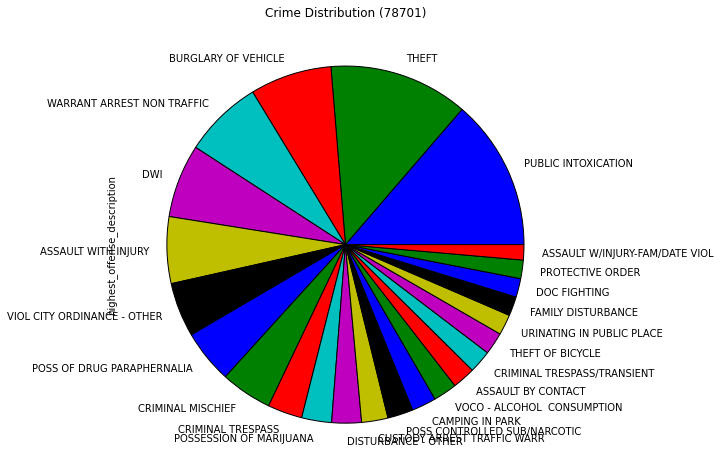

In [30]:
# Examining crime in the 78701 area
df_01 = df[df.zip_code == 78701]

# Create a dataframe for the top crime categories in the zipcode
df_01_off = df_01.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_01_off)
display(df_01.highest_offense_description.value_counts(normalize=True).head(24))
df_01_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78701)")

<a id='q3'></a>
### D. How is crime distributed in 78753 (Rundberg & N Lamar)? 

THEFT                             17214
BURGLARY OF VEHICLE               15997
FAMILY DISTURBANCE                14760
CRIMINAL MISCHIEF                  9524
THEFT BY SHOPLIFTING               7667
ASSAULT W/INJURY-FAM/DATE VIOL     7207
BURGLARY OF RESIDENCE              6093
DWI                                5071
DISTURBANCE - OTHER                4796
CUSTODY ARREST TRAFFIC WARR        4362
AUTO THEFT                         4276
HARASSMENT                         4274
POSS OF DRUG PARAPHERNALIA         3739
PUBLIC INTOXICATION                3382
ASSAULT WITH INJURY                3340
CRIMINAL TRESPASS                  3163
POSS CONTROLLED SUB/NARCOTIC       2999
RUNAWAY CHILD                      2942
WARRANT ARREST NON TRAFFIC         2809
POSSESSION OF MARIJUANA            2718
BURGLARY NON RESIDENCE             2498
VIOL CITY ORDINANCE - OTHER        1875
Name: highest_offense_description, dtype: int64
----------------------------------
THEFT                             0.0

<AxesSubplot:title={'center':'Crime Distribution (78753)'}, ylabel='highest_offense_description'>

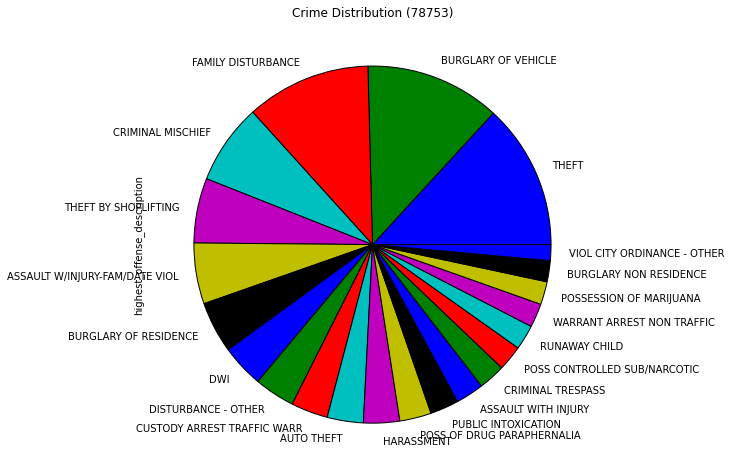

In [31]:
# Examining crime in the 78753 area
df_53 = df[df.zip_code == 78753]

# Create a dataframe for the top 10 crime categories in the zipcode
df_53_off = df_53.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
print(df_53_off)
print("----------------------------------")
print(df_53.highest_offense_description.value_counts(normalize=True).head(22))
df_53_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78753)")

<a id='q4'></a>
### E. How is crime distributed in 78741 (E Riverside/Oltorf)? 

FAMILY DISTURBANCE                20462
BURGLARY OF VEHICLE               19853
THEFT                             15652
CRIMINAL MISCHIEF                 11092
ASSAULT W/INJURY-FAM/DATE VIOL     9662
BURGLARY OF RESIDENCE              8899
PUBLIC INTOXICATION                6390
CUSTODY ARREST TRAFFIC WARR        6011
DWI                                5684
HARASSMENT                         5553
DISTURBANCE - OTHER                5186
AUTO THEFT                         4674
ASSAULT WITH INJURY                4554
CRIMINAL TRESPASS                  3939
POSS CONTROLLED SUB/NARCOTIC       3884
POSSESSION OF MARIJUANA            3797
THEFT BY SHOPLIFTING               3587
POSS OF DRUG PARAPHERNALIA         3542
WARRANT ARREST NON TRAFFIC         3448
RUNAWAY CHILD                      2799
VIOL CITY ORDINANCE - OTHER        2196
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.098435
BURGLARY OF VEHICLE               

<AxesSubplot:title={'center':'Crime Distribution (78741)'}, ylabel='highest_offense_description'>

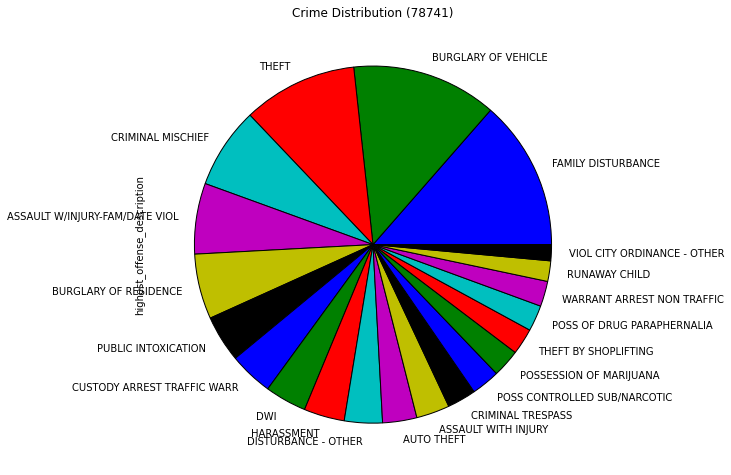

In [32]:
# Examining crime in the 78741 area (the highest amount of crime of any Austin zip code)
df_41 = df[df.zip_code == 78741]

# Create a dataframe for the top crime categories in the zipcode
df_41_off = df_41.highest_offense_description.value_counts().head(21)

# print the different crime values & then as percentages
print(df_41_off)
print("----------------------------------")
print(df_41.highest_offense_description.value_counts(normalize=True).head(21))
df_41_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78741)")

<a id='q5'></a>
### F. How is crime distributed in 78745 (far south Austin)?

FAMILY DISTURBANCE                15045
BURGLARY OF VEHICLE               14769
THEFT                             13614
CRIMINAL MISCHIEF                  8560
BURGLARY OF RESIDENCE              5877
ASSAULT W/INJURY-FAM/DATE VIOL     5781
HARASSMENT                         5165
DISTURBANCE - OTHER                4541
DWI                                4429
PUBLIC INTOXICATION                4004
CUSTODY ARREST TRAFFIC WARR        3248
BURGLARY NON RESIDENCE             2883
AUTO THEFT                         2876
ASSAULT WITH INJURY                2690
RUNAWAY CHILD                      2610
POSSESSION OF MARIJUANA            2594
WARRANT ARREST NON TRAFFIC         2108
POSS CONTROLLED SUB/NARCOTIC       2034
THEFT BY SHOPLIFTING               2001
CRIMINAL TRESPASS                  1967
IDENTITY THEFT                     1605
POSS OF DRUG PARAPHERNALIA         1520
Name: highest_offense_description, dtype: int64
----------------------------------
FAMILY DISTURBANCE                0.0

<AxesSubplot:title={'center':'Crime Distribution (78745)'}, ylabel='highest_offense_description'>

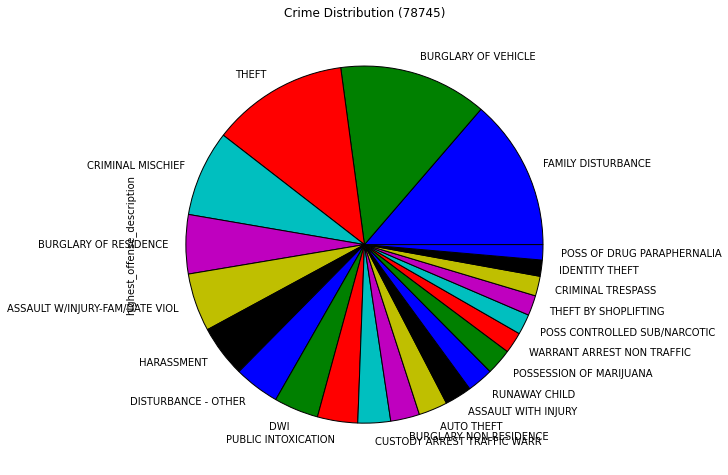

In [33]:
# Examining crime in the 78745 area
df_45 = df[df.zip_code == 78745]

# Create a dataframe for the top 10 crime categories in the zipcode
df_45_off = df_45.highest_offense_description.value_counts().head(22)

# print the different crime values & then as percentages
print(df_45_off)
print("----------------------------------")
print(df_45.highest_offense_description.value_counts(normalize=True).head(22))
df_45_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78745)")

<a id='q6'></a>
### G. How is crime distributed in 78705 (UT campus area)?

BURGLARY OF VEHICLE               8666
THEFT                             5637
CRIMINAL MISCHIEF                 4986
THEFT OF BICYCLE                  3503
PUBLIC INTOXICATION               2629
BURGLARY OF RESIDENCE             2127
WARRANT ARREST NON TRAFFIC        1549
CRIMINAL TRESPASS                 1356
AUTO THEFT                        1336
ASSAULT WITH INJURY               1262
HARASSMENT                        1222
DWI                               1213
FAMILY DISTURBANCE                1205
DISTURBANCE - OTHER               1123
BURGLARY NON RESIDENCE             884
CRIMINAL TRESPASS/TRANSIENT        868
VIOL CITY ORDINANCE - OTHER        793
GRAFFITI                           781
CUSTODY ARREST TRAFFIC WARR        780
ASSAULT W/INJURY-FAM/DATE VIOL     703
POSSESSION OF MARIJUANA            657
ASSAULT BY CONTACT                 623
Name: highest_offense_description, dtype: int64

'----------------------------------'

BURGLARY OF VEHICLE               0.150642
THEFT                             0.097989
CRIMINAL MISCHIEF                 0.086672
THEFT OF BICYCLE                  0.060893
PUBLIC INTOXICATION               0.045700
BURGLARY OF RESIDENCE             0.036974
WARRANT ARREST NON TRAFFIC        0.026926
CRIMINAL TRESPASS                 0.023572
AUTO THEFT                        0.023224
ASSAULT WITH INJURY               0.021938
HARASSMENT                        0.021242
DWI                               0.021086
FAMILY DISTURBANCE                0.020947
DISTURBANCE - OTHER               0.019521
BURGLARY NON RESIDENCE            0.015367
CRIMINAL TRESPASS/TRANSIENT       0.015089
VIOL CITY ORDINANCE - OTHER       0.013785
GRAFFITI                          0.013576
CUSTODY ARREST TRAFFIC WARR       0.013559
ASSAULT W/INJURY-FAM/DATE VIOL    0.012220
POSSESSION OF MARIJUANA           0.011421
ASSAULT BY CONTACT                0.010830
Name: highest_offense_description, dtype: float64

<AxesSubplot:title={'center':'Crime Distribution (78705)'}, ylabel='highest_offense_description'>

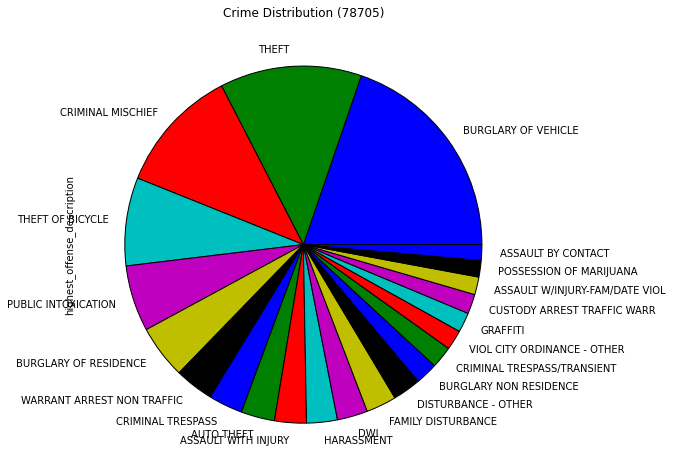

In [34]:
# Examining crime in the 78705 area
df_05 = df[df.zip_code == 78705]

# Create a dataframe for the top 10 crime categories in the zipcode
df_05_off = df_05.highest_offense_description.value_counts().head(22)

# Display the different crime values & then as percentages
display(df_05_off)
display("----------------------------------")
display(df_05.highest_offense_description.value_counts(normalize=True).head(22))
df_05_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78705)")

<a id='q7'></a>
### H. How is crime distributed in 78746? 

BURGLARY OF VEHICLE               5407
THEFT                             5100
THEFT BY SHOPLIFTING              2547
CRIMINAL MISCHIEF                 1275
DWI                                881
FAMILY DISTURBANCE                 764
VIOL CITY ORDINANCE - OTHER        652
HARASSMENT                         630
AUTO THEFT                         608
BURGLARY OF RESIDENCE              522
THEFT FROM PERSON                  462
IDENTITY THEFT                     437
DISTURBANCE - OTHER                433
BURGLARY NON RESIDENCE             357
ASSAULT W/INJURY-FAM/DATE VIOL     339
CRED CARD ABUSE - OTHER            326
PUBLIC INTOXICATION                321
POSSESSION OF MARIJUANA            297
FRAUD - OTHER                      281
SUSPICIOUS PERSON                  259
CUSTODY ARREST TRAFFIC WARR        247
WARRANT ARREST NON TRAFFIC         223
ASSAULT WITH INJURY                198
VIOL WATER SAFETY ACT              195
Name: highest_offense_description, dtype: int64

BURGLARY OF VEHICLE               0.191229
THEFT                             0.180371
THEFT BY SHOPLIFTING              0.090080
CRIMINAL MISCHIEF                 0.045093
DWI                               0.031158
FAMILY DISTURBANCE                0.027020
VIOL CITY ORDINANCE - OTHER       0.023059
HARASSMENT                        0.022281
AUTO THEFT                        0.021503
BURGLARY OF RESIDENCE             0.018462
THEFT FROM PERSON                 0.016340
IDENTITY THEFT                    0.015455
DISTURBANCE - OTHER               0.015314
BURGLARY NON RESIDENCE            0.012626
ASSAULT W/INJURY-FAM/DATE VIOL    0.011989
CRED CARD ABUSE - OTHER           0.011530
PUBLIC INTOXICATION               0.011353
POSSESSION OF MARIJUANA           0.010504
FRAUD - OTHER                     0.009938
SUSPICIOUS PERSON                 0.009160
CUSTODY ARREST TRAFFIC WARR       0.008736
WARRANT ARREST NON TRAFFIC        0.007887
ASSAULT WITH INJURY               0.007003
VIOL WATER 

<AxesSubplot:title={'center':'Crime Distribution (78746)'}, ylabel='highest_offense_description'>

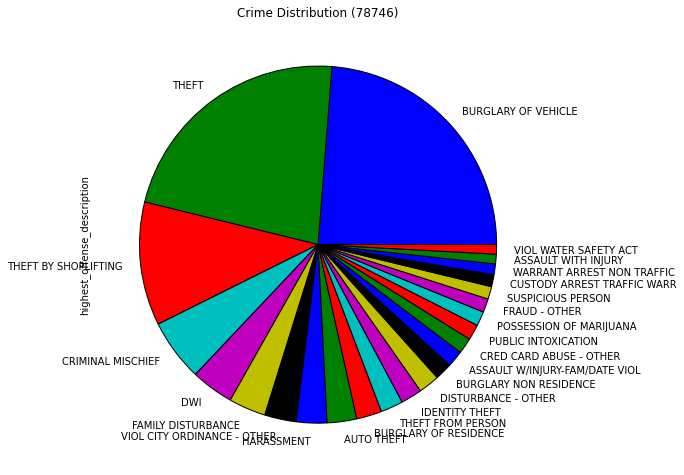

In [35]:
# Examining crime in the 78701 area
df_46 = df[df.zip_code == 78746]

# Create a dataframe for the top crime categories in the zipcode
df_46_off = df_46.highest_offense_description.value_counts().head(24)

# Display the different crime values & then as percentages
display(df_46_off)
display(df_46.highest_offense_description.value_counts(normalize=True).head(24))
df_46_off.plot.pie(figsize=(8, 8), title="Crime Distribution (78746)")

<a id='q8'></a>
### I. How are violent crimes, in particular murder, capital murder, armed robbery, aggrivated assault, and rape distributed? 

In [36]:
# Creating separate dataframes for overall & violent crime
df_viol = df.query(
    'highest_offense_description == ["AGG ASSAULT", "AGG ROBBERY/DEADLY WEAPON", "CAPITAL MURDER", "MURDER", "RAPE"]'
)
df_viol_mur = df.query('highest_offense_description == ["MURDER", "CAPITAL MURDER"]')
df_agg_asslt = df[df.highest_offense_description == "AGG ASSAULT"]
df_agg_robbery = df[df.highest_offense_description == "AGG ROBBERY/DEADLY WEAPON"]

# Creating yearly dataframes
# Annual overall crime
df_17 = df[df.year == 2017]
df_18 = df[df.year == 2018]
df_19 = df[df.year == 2019]
df_20 = df[df.year == 2020]

# Annual violent crime
df_viol_17 = df_viol[df_viol.year == 2017]
df_viol_18 = df_viol[df_viol.year == 2018]
df_viol_19 = df_viol[df_viol.year == 2019]
df_viol_20 = df_viol[df_viol.year == 2020]

# Annual murders
df_viol_mur_17 = df_viol_mur[df_viol_mur.year == 2017]
df_viol_mur_18 = df_viol_mur[df_viol_mur.year == 2018]
df_viol_mur_19 = df_viol_mur[df_viol_mur.year == 2019]
df_viol_mur_20 = df_viol_mur[df_viol_mur.year == 2020]

78741.0    0.130572
78753.0    0.099174
78758.0    0.094228
78701.0    0.074753
78723.0    0.074617
78702.0    0.074109
78745.0    0.057750
78752.0    0.052398
78744.0    0.051992
78704.0    0.048266
78721.0    0.027672
78724.0    0.024556
78705.0    0.021474
78757.0    0.020695
78748.0    0.017477
78751.0    0.017071
78759.0    0.013718
78722.0    0.009484
78754.0    0.008332
78727.0    0.007960
78749.0    0.007858
78617.0    0.007689
78729.0    0.007147
78750.0    0.005758
78731.0    0.005250
Name: zip_code, dtype: float64

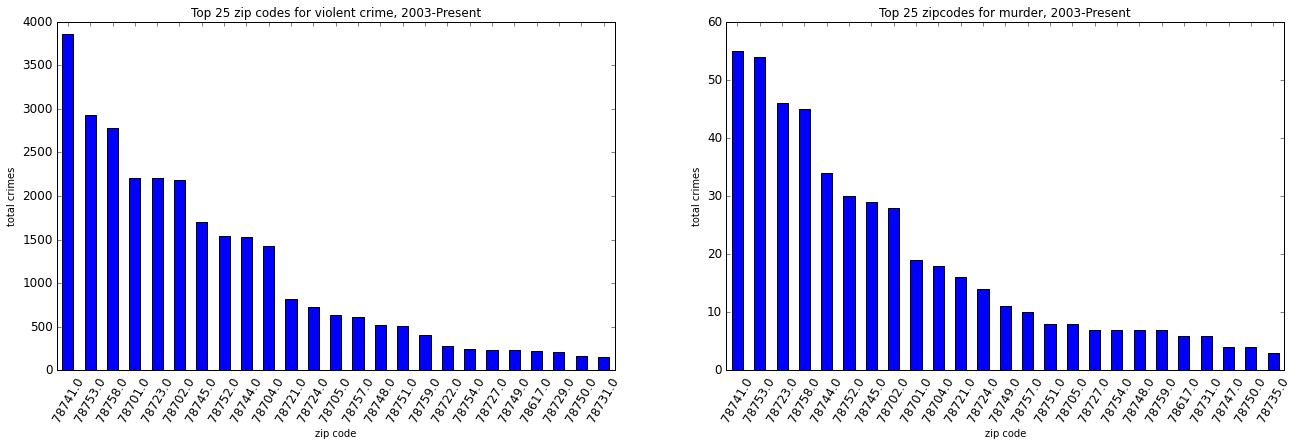

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
zip_code,,,,,
78610.0,1,0,0,0,0
78613.0,15,11,0,1,6
78617.0,122,62,0,6,37
78621.0,1,0,0,0,0
78634.0,1,0,0,0,0
78652.0,2,0,0,0,0
78653.0,10,3,0,1,1
78660.0,65,28,0,2,17
78664.0,3,0,0,0,0


<Figure size 432x288 with 0 Axes>

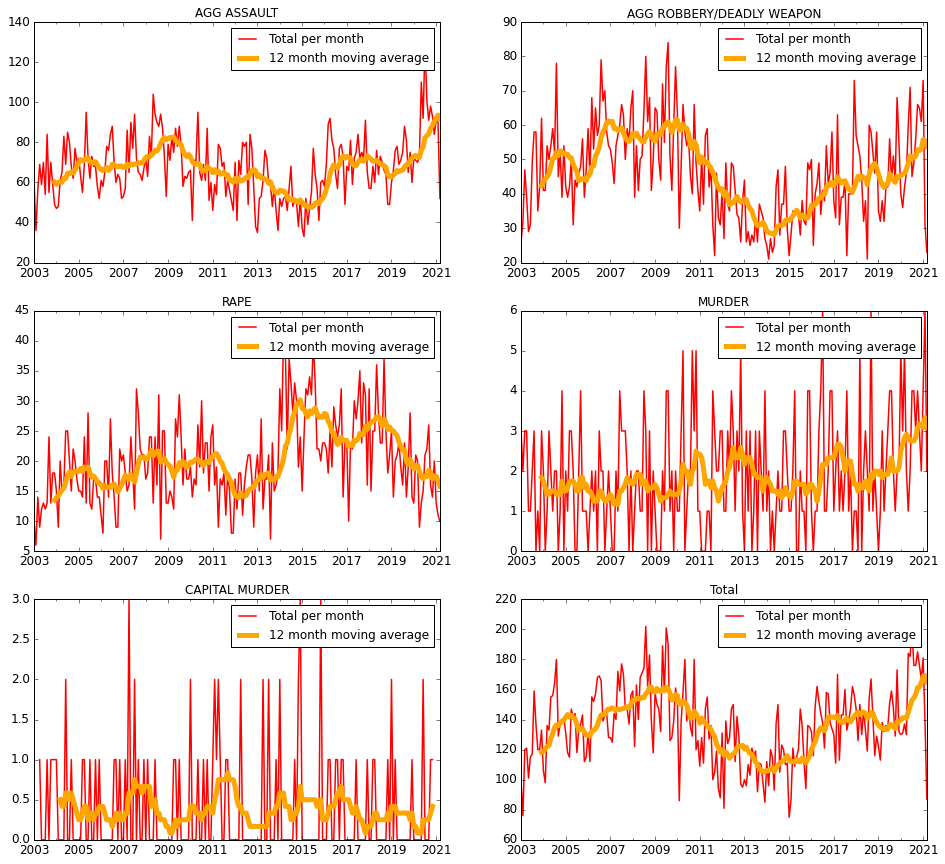

In [37]:
display(df_viol.zip_code.value_counts(normalize=True).head(25))

fig, axs = plt.subplots(figsize=(22, 6.25), ncols=2)
df_viol.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zip codes for violent crime, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[0],
)
df_viol_mur.zip_code.value_counts().head(25).plot.bar(
    title="Top 25 zipcodes for murder, 2003-Present",
    xlabel="zip code",
    ylabel="total crimes",
    fontsize=12,
    rot=60,
    ax=axs[1],
)
plt.show()

viol_freq = pd.crosstab(df_viol.zip_code, df_viol.highest_offense_description)
mur_freq = pd.crosstab(df_viol_mur.zip_code, df_viol_mur.highest_offense_description)
display(viol_freq)

monthly = pd.DataFrame(
    df_viol[df_viol["highest_offense_description"] == "AGG ASSAULT"]
    .resample("M")
    .size()
)
monthly.columns = ["AGG ASSAULT"]

for i in df_viol["highest_offense_description"].unique():
    monthly[i] = pd.DataFrame(
        df_viol[df_viol["highest_offense_description"] == i].resample("M").size()
    )

monthly["Total"] = monthly.sum(axis=1)

crimeTypes = monthly.columns

plt.figure(1)
plt.figure(figsize=(16, 25))

i = 521
for eachCrime in crimeTypes:
    plt.subplot(i)
    monthly[eachCrime].plot(color="red", linewidth=1.5, label="Total per month")
    monthly[eachCrime].rolling(window=12).mean().plot(
        color="orange", linewidth=5, label="12 month moving average"
    )
    plt.title(eachCrime, fontsize=12)
    plt.xlabel("")
    plt.legend(prop={"size": 12})
    plt.tick_params(labelsize=12)
    i = i + 1

### J. Distribution of violent crime and murders across council districts, APD Districts, and APD sectors 

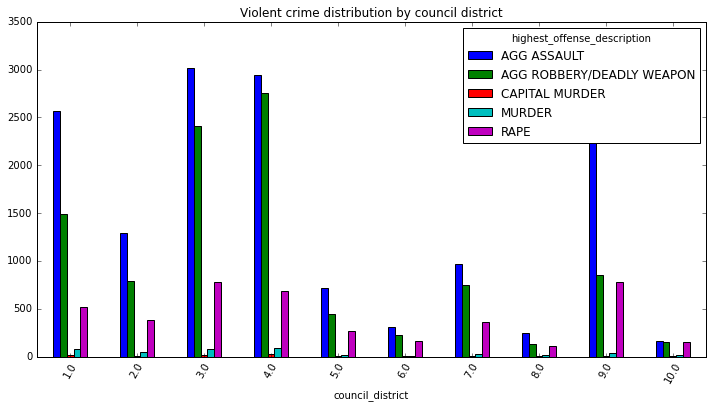

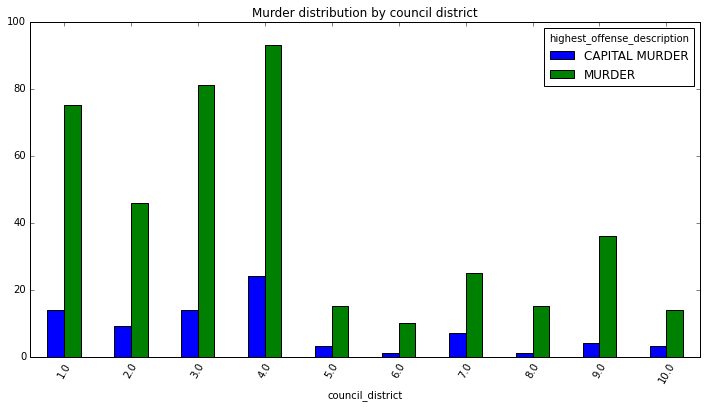

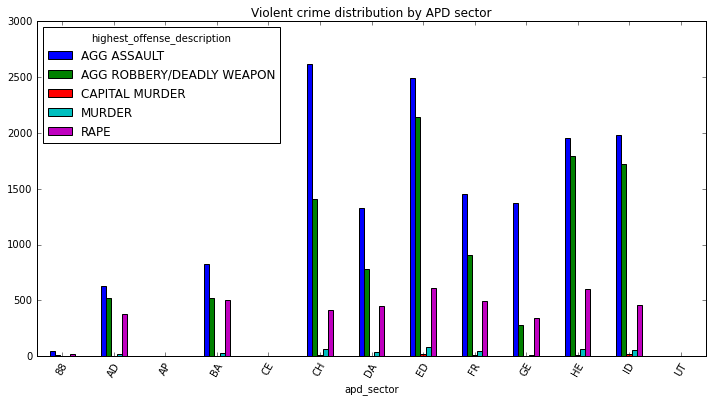

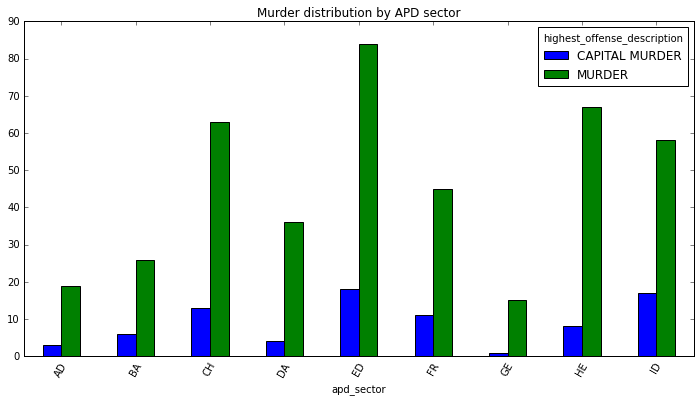

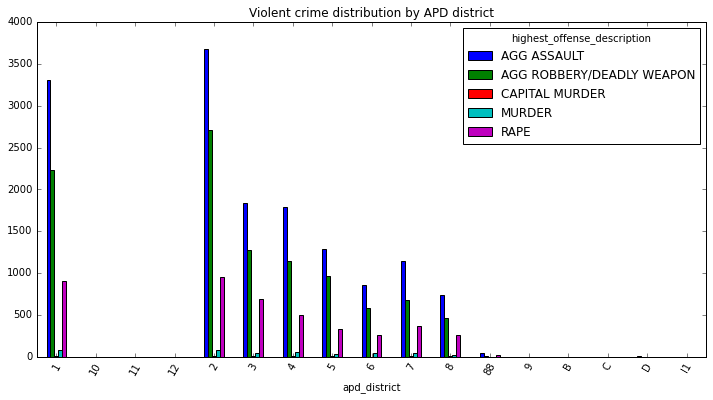

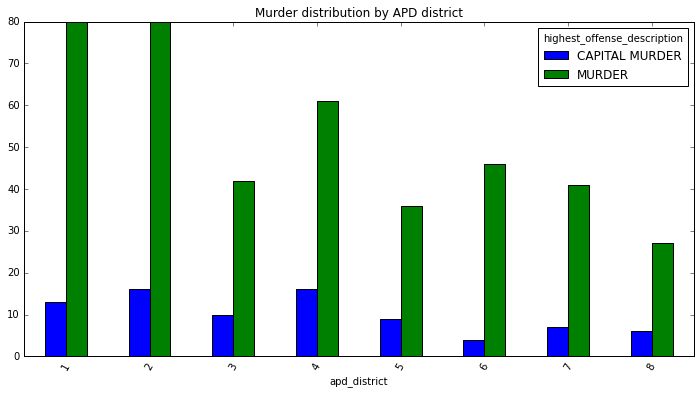

In [38]:
pd.crosstab(df_viol.council_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by council district"
)
plt.show()

pd.crosstab(
    df_viol_mur.council_district, df_viol_mur.highest_offense_description
).plot.bar(figsize=(12, 6), rot=60, title="Murder distribution by council district")
plt.show()

pd.crosstab(df_viol.apd_sector, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol_mur.apd_sector, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD sector"
)
plt.show()

pd.crosstab(df_viol.apd_district, df_viol.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Violent crime distribution by APD district"
)
plt.show()

pd.crosstab(df_viol_mur.apd_district, df_viol_mur.highest_offense_description).plot.bar(
    figsize=(12, 6), rot=60, title="Murder distribution by APD district"
)
plt.show()

### K. Violent crime and murder distribution by location type

highest_offense_description,AGG ASSAULT,AGG ROBBERY/DEADLY WEAPON,CAPITAL MURDER,MURDER,RAPE
location_type,,,,,
ABANDONED/CONDEMNED STRUCTURE,13,7,0,1,4
AMUSEMENT PARK,0,2,0,0,0
ARENA / STADIUM / FAIRGROUNDS / COLISEUM,2,0,0,0,0
ATM SEPARATE FROM BANK,1,3,0,0,0
AUTO DEALERSHIP NEW / USED,10,2,0,0,1
BANKS / SAVINGS & LOAN,5,134,0,1,1
BAR / NIGHT CLUB,662,46,2,8,78
CAMP / CAMPGROUND,22,2,0,0,3
CHURCH / SYNAGOGUE / TEMPLE / MOSQUE,20,5,1,0,7


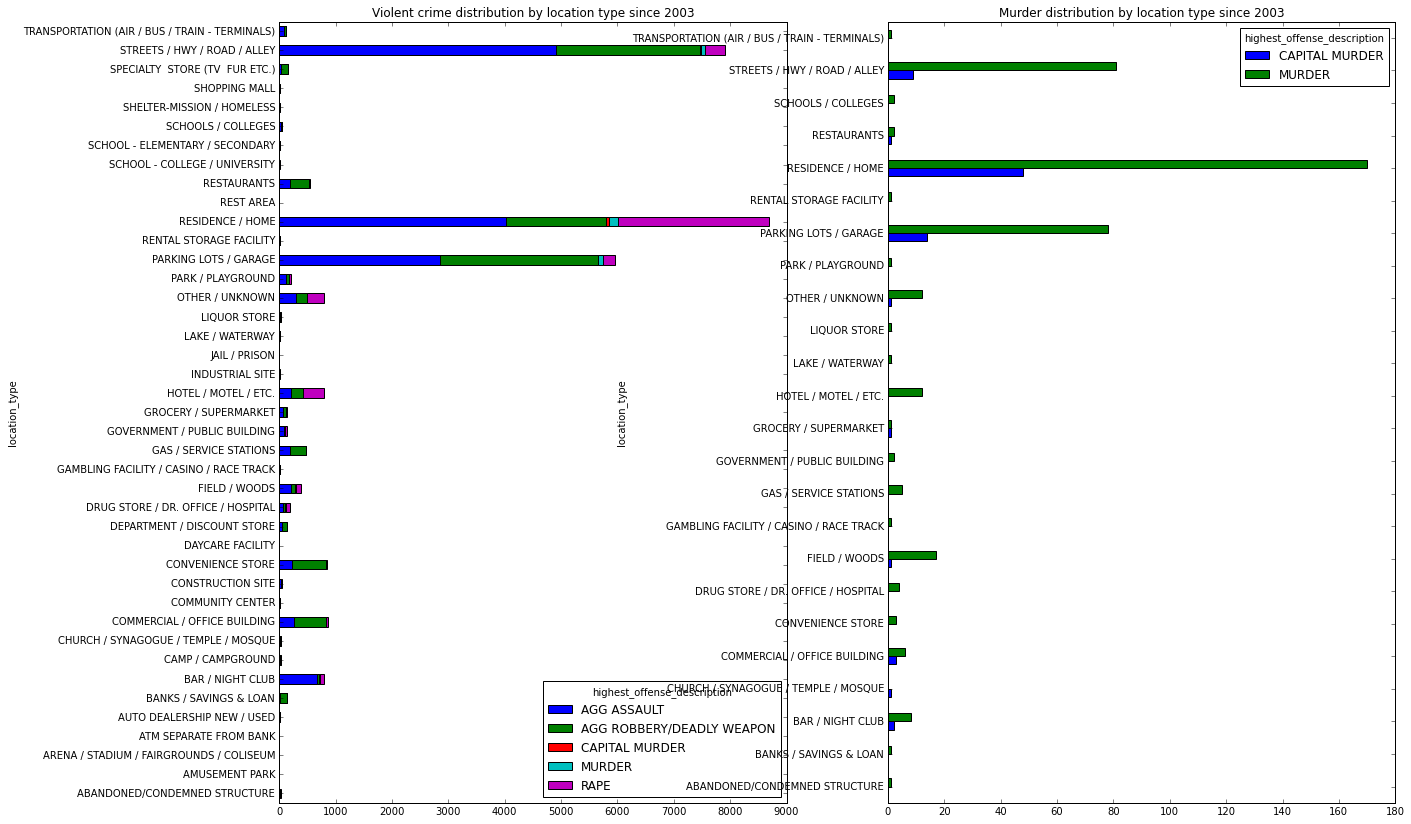

In [39]:
viol_loc = pd.crosstab(df_viol.location_type, df_viol.highest_offense_description)
display(viol_loc)
mur_loc = pd.crosstab(
    df_viol_mur.location_type, df_viol_mur.highest_offense_description
)

fig, axs = plt.subplots(figsize=(20, 14), ncols=2)
viol_loc.plot.barh(
    title="Violent crime distribution by location type since 2003",
    ax=axs[0],
    stacked=True,
)
mur_loc.plot.barh(title="Murder distribution by location type since 2003", ax=axs[1])
plt.show()

<a id='q9'></a>
### L. How does violent crime appear on the map?

** Note: Rape incidents provide no location coordinates therefore cannot be shown on a map. **

#### Aggravated assault 

In [20]:
agg_asslt_coords_heat = df_agg_asslt[
    (df_agg_asslt["latitude"].isnull() == False)
    & (df_agg_asslt["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(agg_asslt_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="agg_asslt_heatmap.html")

k

#### Armed robbery 

In [21]:
agg_robbery_coords_heat = df_agg_robbery[
    (df_agg_robbery["latitude"].isnull() == False)
    & (df_agg_robbery["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(
        agg_robbery_coords_heat[["latitude", "longitude"]].values, radius=15
    )
)

k.save(outfile="agg_robbery_heatmap.html")

k

<a id='q8'></a>
#### Murder  

In [22]:
mur_coords_heat = df_viol_mur[
    (df_viol_mur["latitude"].isnull() == False)
    & (df_viol_mur["longitude"].isnull() == False)
]

k = folium.Map(location=[30.2672, -97.7431], tiles="OpenStreetMap", zoom_start=12)

k.add_child(
    plugins.HeatMap(mur_coords_heat[["latitude", "longitude"]].values, radius=15)
)

k.save(outfile="mur_heatmap.html")

k

<a id='q10'></a>
### M. Are there any addresses where violent crime and murder occurs frequently?

In [23]:
df.address.value_counts().head(50)

4110 GUADALUPE ST                 11539
1030 NORWOOD PARK BLVD             9212
2901 S CAPITAL OF TEXAS HWY NB     8120
3600 PRESIDENTIAL BLVD             7356
500 E 7TH ST                       6114
1000 E 41ST ST                     5821
3708 S 2ND ST                      5255
2508 E RIVERSIDE DR                4827
11200 LAKELINE MALL DR             4503
9300 S IH 35 SVRD SB               4067
715 E 8TH ST                       4001
9414 N LAMAR BLVD                  3869
1137 GUNTER ST                     3202
710 E BEN WHITE BLVD SVRD WB       3196
6001 AIRPORT BLVD                  2923
12900 N IH 35 SVRD SB              2808
5800 TECHNI CENTER DR              2744
5901 AIRPORT BLVD                  2718
2701 E 7TH ST                      2713
6118 FAIRWAY ST                    2667
1300 CROSSING PL                   2633
1515 WICKERSHAM LN                 2442
6409 SPRINGDALE RD                 2436
2400 S CONGRESS AVE                2435
601 E 15TH ST                      2362


In [24]:
# Show addresses with 50 or more reported violent crimes
df_viol.address.value_counts().head(13)

500 E 7TH ST                83
9515 N LAMAR BLVD           66
1700 BURTON DR              63
00 BLOCK UNKNOWN            59
6409 SPRINGDALE RD          59
9601 MIDDLE FISKVILLE RD    58
900 BLOCK E 32ND ST         55
9200 NORTH PLZ              53
1071 CLAYTON LN             53
1030 NORWOOD PARK BLVD      53
6103 MANOR RD               52
1137 GUNTER ST              51
2237 E RIVERSIDE DR         51
Name: address, dtype: int64

In [25]:
# Show addresses with 2 or more reported murders
df_viol_mur.address.value_counts().head(30)

8800 N IH 35 SVRD SB         3
6409 SPRINGDALE RD           3
6407 SPRINGDALE RD           3
8610 N LAMAR BLVD            3
4700 E RIVERSIDE DR          3
6600 ED BLUESTEIN BLVD SB    2
815 W SLAUGHTER LN           2
1050 SPRINGDALE RD           2
744 W WILLIAM CANNON DR      2
10503 N LAMAR BLVD           2
9220 N IH 35 SVRD SB         2
7000 DECKER LN               2
9010 GALEWOOD DR             2
2915 S IH 35 SVRD NB         2
201 W 5TH ST                 2
10610 MORADO CIR             2
1137 GUNTER ST               2
9601 MIDDLE FISKVILLE RD     2
2713 S CONGRESS AVE          2
605 MASTERSON PASS           2
2400 WICKERSHAM LN           2
2508 E RIVERSIDE DR          2
2501 ANKEN DR                2
8225 SAM RAYBURN DR          2
8912 N LAMAR BLVD            2
833 FAIRFIELD DR             2
6118 FAIRWAY ST              2
9200 NORTH PLZ               2
1711 RUTLAND DR              2
601 E 15TH ST                2
Name: address, dtype: int64

In [26]:
df_clean = df.copy()
df_clean.to_csv("df_clean.csv")

df_17.to_csv("df_17.csv")
df_18.to_csv("df_18.csv")
df_19.to_csv("df_19.csv")
df_20.to_csv("df_20.csv")

df_viol_17.to_csv("df_viol_17.csv")
df_viol_18.to_csv("df_viol_18.csv")
df_viol_19.to_csv("df_viol_19.csv")
df_viol_20.to_csv("df_viol_20.csv")

df_viol_mur_17.to_csv("df_viol_mur_17.csv")
df_viol_mur_18.to_csv("df_viol_mur_18.csv")
df_viol_mur_19.to_csv("df_viol_mur_19.csv")
df_viol_mur_20.to_csv("df_viol_mur_20.csv")

df_viol.to_csv("df_viol.csv")
df_viol_mur.to_csv("df_viol_mur.csv")

df_01.to_csv("df_01.csv")
df_53.to_csv("df_53.csv")
df_41.to_csv("df_41.csv")
df_45.to_csv("df_45.csv")
df_05.to_csv("df_05.csv")
df_46.to_csv("df_46.csv")